In [ ]:
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

### Importing Face Mask DataSet

In [ ]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data  test1.jpg  test2.jpg  without.webp


### Importing the Basic Dependencies

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
# Creates a list of filenames in the given directory

['with_mask_1753.jpg', 'with_mask_986.jpg', 'with_mask_3366.jpg', 'with_mask_3571.jpg', 'with_mask_793.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])

['without_mask_890.jpg', 'without_mask_1992.jpg', 'without_mask_1869.jpg', 'without_mask_3123.jpg', 'without_mask_1642.jpg']


In [ ]:
print('Number of with mask images: ', len(with_mask_files))
print('Number of without mask images: ', len(without_mask_files))

Number of with mask images:  3725
Number of without mask images:  3828


Almost equal so no Imbalance

### Creating labels for both the Classes
- with mask --> 1
- without mask --> 0

In [ ]:
with_mask_labels = [1] * 3725
without_mask_labels = [0] * 3828

In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
labels = with_mask_labels + without_mask_labels

print(len(labels))

7553


**Displaying the Images**

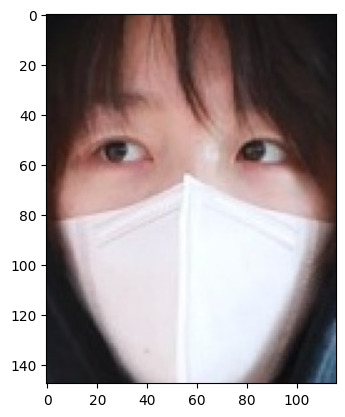

In [ ]:
# with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1753.jpg')
imgplot = plt.imshow(img)
plt.show()
# here we are representing the image as a np array then plotting it

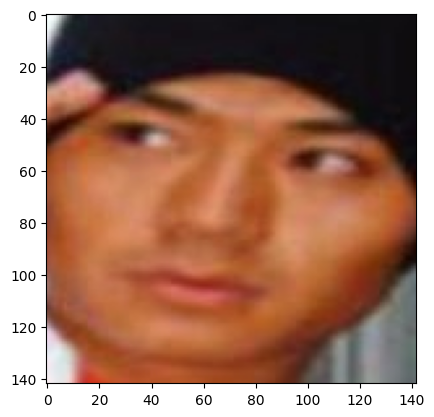

In [ ]:
# without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_890.jpg')
imgplot = plt.imshow(img)
plt.show()

Here we dont know if the images are of the same size so we have to keep in mind during preprocessing

### Image Processing
- Resize
- Convert the images to nparray

In [ ]:
# Resizing, dealing with frrey scale images, convert to np.array

with_mask_path = '/content/data/with_mask/'
# put that slash at the end
data = []

for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file) # to read the image and convert it to pillow object
  image = image.resize((128,128))

  image = image.convert("RGB") # TO DEAL WITH GREY SCALE IMAGE
  image = np.array(image)
  data.append(image)


without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))

  image = image.convert("RGB")
  image = np.array(image)
  data.append(image)


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
print(len(data))
print(type(data))

7553
<class 'list'>


In [ ]:
print(data[0])

[[[ 15  17  16]
  [ 16  18  17]
  [ 17  18  20]
  ...
  [ 17  18  20]
  [ 16  17  19]
  [ 15  16  18]]

 [[ 15  17  16]
  [ 16  18  17]
  [ 16  17  19]
  ...
  [ 17  18  20]
  [ 16  17  19]
  [ 15  16  18]]

 [[ 15  16  19]
  [ 16  17  19]
  [ 16  17  19]
  ...
  [ 18  18  20]
  [ 17  17  19]
  [ 16  16  18]]

 ...

 [[ 38  39  44]
  [ 36  37  42]
  [ 31  32  37]
  ...
  [ 69  99 127]
  [ 51  82 109]
  [ 59  90 118]]

 [[ 37  38  43]
  [ 37  38  43]
  [ 34  35  40]
  ...
  [ 67  97 125]
  [ 55  86 114]
  [ 60  91 119]]

 [[ 34  35  40]
  [ 37  38  43]
  [ 37  38  43]
  ...
  [ 62  92 120]
  [ 55  86 114]
  [ 58  89 117]]]


In [ ]:
print(data[0].shape)

(128, 128, 3)


In [ ]:
# converting data and labels to np array
X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


### Train Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2, stratify = Y)

In [ ]:
print(X_train.shape, X_test.shape)

(6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
# Scaling the data
X_train_scaled = X_train/ 255.0
X_test_scaled = X_test/255.0

# basically done min_max scaling
# white -->1
# black -->0

In [ ]:
X_train_scaled[0]

array([[[0.21176471, 0.22745098, 0.22352941],
        [0.21568627, 0.23137255, 0.22745098],
        [0.21960784, 0.23529412, 0.23137255],
        ...,
        [0.16078431, 0.18039216, 0.25490196],
        [0.14901961, 0.18431373, 0.27058824],
        [0.14117647, 0.19607843, 0.22745098]],

       [[0.21960784, 0.23529412, 0.23137255],
        [0.21960784, 0.23529412, 0.23137255],
        [0.22352941, 0.23921569, 0.23137255],
        ...,
        [0.14901961, 0.18823529, 0.25490196],
        [0.14901961, 0.20392157, 0.27843137],
        [0.14901961, 0.19215686, 0.23921569]],

       [[0.23529412, 0.25098039, 0.24705882],
        [0.23137255, 0.24705882, 0.24313725],
        [0.22352941, 0.23921569, 0.23921569],
        ...,
        [0.10980392, 0.18039216, 0.23137255],
        [0.11372549, 0.19215686, 0.23137255],
        [0.12941176, 0.17254902, 0.23529412]],

       ...,

       [[0.58431373, 0.19215686, 0.2627451 ],
        [0.56862745, 0.17647059, 0.23921569],
        [0.55686275, 0

### Building a Convolutional Neural Network

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation,Conv2D,MaxPooling2D,Flatten, Dropout, Dense

In [ ]:
num_of_classes = 2

model = Sequential([
    Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, kernel_size = (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),

    Dense(128, activation = 'relu'),
    Dropout(0.3),

    Dense(64, activation = 'relu'),
    Dropout(0.3),

    Dense(num_of_classes, activation = 'sigmoid')

])

In [ ]:
# comlpile the neural network

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['acc']
)

In [ ]:
# training the NN
history = model.fit(X_train_scaled, Y_train, validation_split = 0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 11s 24ms/step - loss: 0.4991 - acc: 0.7887 - val_loss: 0.3058 - val_acc: 0.8612
Epoch 2/5
170/170 [==============================] - 3s 18ms/step - loss: 0.2785 - acc: 0.8860 - val_loss: 0.2449 - val_acc: 0.8942
Epoch 3/5
170/170 [==============================] - 3s 18ms/step - loss: 0.2292 - acc: 0.9053 - val_loss: 0.2584 - val_acc: 0.9058
Epoch 4/5
170/170 [==============================] - 3s 20ms/step - loss: 0.1782 - acc: 0.9331 - val_loss: 0.2241 - val_acc: 0.9174
Epoch 5/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1416 - acc: 0.9437 - val_loss: 0.2751 - val_acc: 0.9041


### Model Evaluation

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy = ', accuracy)

48/48 [==============================] - 0s 9ms/step - loss: 0.2564 - acc: 0.8895
Test Accuracy =  0.8894771933555603


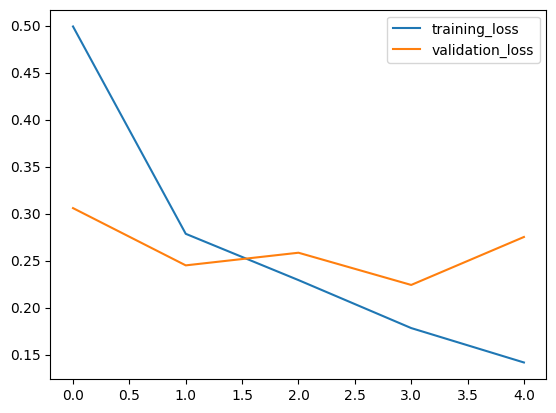

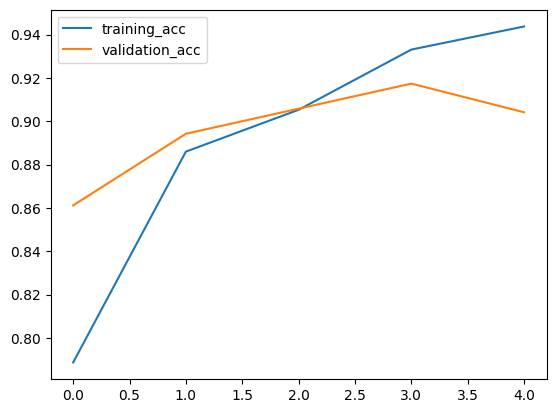

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label = 'training_loss')
plt.plot(h.history['val_loss'], label = 'validation_loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label = 'training_acc')
plt.plot(h.history['val_acc'], label = 'validation_acc')
plt.legend()
plt.show()

**Predictive System**

In [ ]:
def pred_system():
  input_image_path = input('Path of the image: ')

  input_image = cv2.imread(input_image_path)

  cv2_imshow(input_image)

  input_image_resized = cv2.resize(input_image, (128,128))

  cv2_imshow(input_image_resized)

  input_image_scaled = input_image_resized/255

  input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])

  input_prediction = model.predict(input_image_reshaped)

  print(input_prediction)

  input_pred_label = np.argmax(input_prediction)

  print(input_pred_label)

  if input_pred_label == 1:
    print('The person in the image is wearing a mask')

  else:
    print('The person in the image is not wearing a mask')

Path of the image: /content/test1.jpg


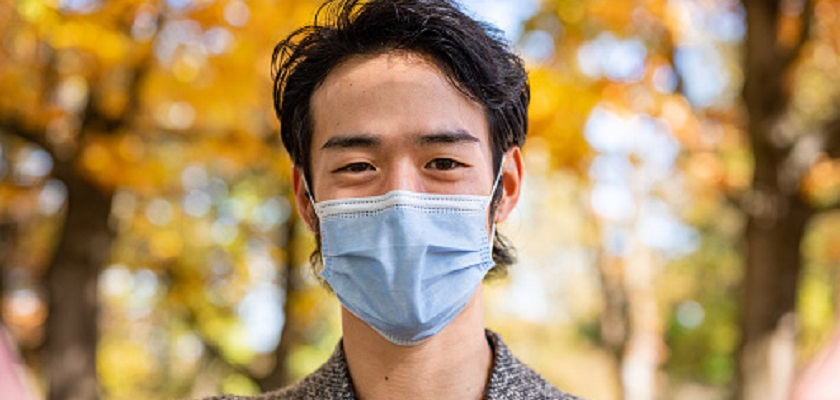

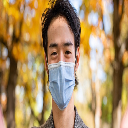

1/1 [==============================] - 0s 31ms/step
[[0.45012623 0.6341726 ]]
1
The person in the image is wearing a mask


In [ ]:
pred_system()

In [ ]:
pred_system()

In [ ]:
pred_system()